In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

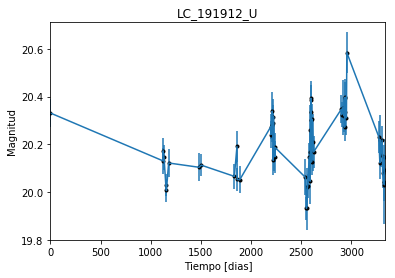

In [2]:
 data = np.genfromtxt('LC_191912_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191912_U')
plt.savefig("LC_191912_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

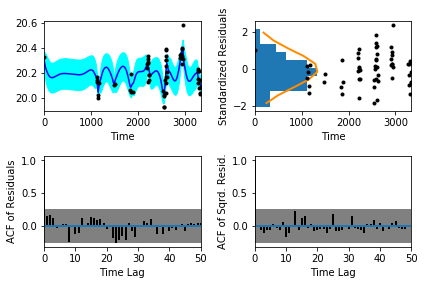

In [7]:
sample.assess_fit()

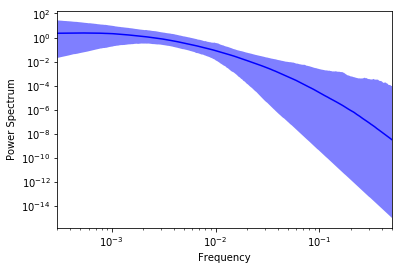

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

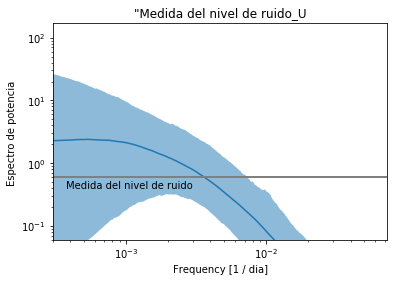

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191912_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191912_U')

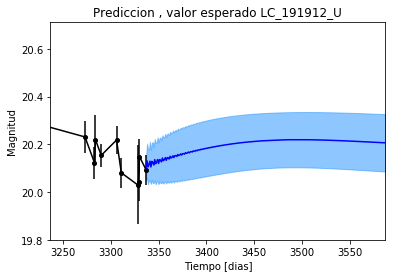

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191912_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191912_U')

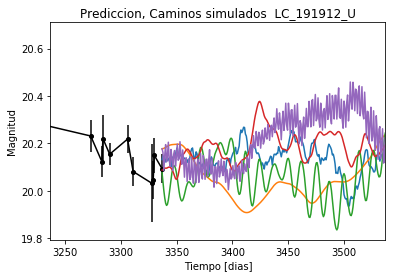

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191912_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


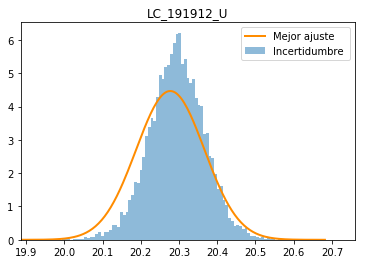

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191912_U')
plt.savefig("Mejor_ajuste_LC_191912_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191912_U')

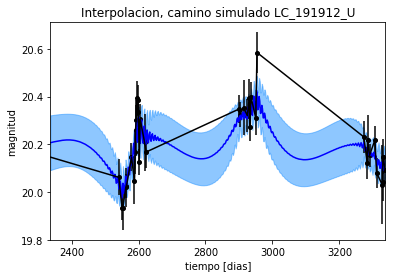

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_U')

Text(0.5,1,'Interpolacion, camino simulado LC_191912_U')

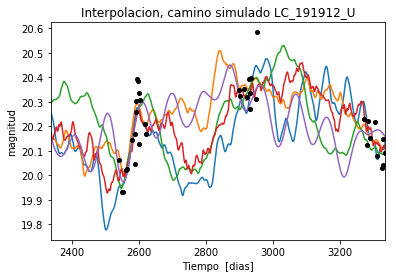

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_U')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 836.504084227
Median: 0.0161973177121
Standard deviation: 0.212758091178
68% credibility interval: [ 0.0013979   0.24053031]
95% credibility interval: [  3.96629359e-04   8.22036177e-01]
99% credibility interval: [  3.18397234e-04   9.70526347e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1449.26183098
Median: 0.00578785877623
Standard deviation: 0.120347548306
68% credibility interval: [ 0.00090573  0.0545089 ]
95% credibility interval: [  3.63730378e-04   4.07424854e-01]
99% credibility interval: [  3.10709441e-04   8.22077661e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 362.004298122
Median: 0.0510993269007


In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1280.37041075
Median: 82.3451320683
Standard deviation: 1.72094232394
68% credibility interval: [ 80.42918175  83.63452668]
95% credibility interval: [ 77.87722322  84.3724219 ]
99% credibility interval: [ 75.78335823  84.98809466]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 392.778198465
Median: 1.12124802359
Standard deviation: 2.47857126034
68% credibility interval: [ 0.14920505  4.76645178]
95% credibility interval: [ 0.03400792  8.56467171]
99% credibility interval: [  0.01620496  11.12277201]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 474.288883953
Median: 1.01175509276
Standard deviation: 10.0875947817
68% credibility interval: [  0.04636592  11.71002437]
95% credibility interval: [  5.45428002e

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12017.3635697
Median: 2.60924992122e-30
Standard deviation: 4.67087248248e+84
68% credibility interval: [  2.24287935e-67   1.12530987e+16]
95% credibility interval: [  2.38670461e-95   4.78720437e+71]
99% credibility interval: [  3.07805537e-116   5.86337294e+081]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3372.11685055
Median: 20.1763801427
Standard deviation: 0.052632816556
68% credibility interval: [ 20.13368598  20.22312847]
95% credibility interval: [ 20.07640898  20.28913444]
99% credibility interval: [ 20.02544695  20.35630362]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 763.687320298
Median: 0.0188682045037
Standard deviation: 0.248111011008
68% credibility interval: [ 0.          0.41851108]
95% credibility interval: [ 0.          0.86836035]
99% credibility interval: [ 0.          0.96823955]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 763.687320298
Median: 0.0188682045037
Standard deviation: 0.248111011008
68% credibility interval: [ 0.          0.41851108]
95% credibility interval: [ 0.          0.86836035]
99% credibility interval: [ 0.          0.96823955]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 709.184713253
Median: 0.0
Standard deviation: 0.0013929515761
68% cred

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1280.37041075
Median: 82.3451320683
Standard deviation: 1.72094232394
68% credibility interval: [ 80.42918175  83.63452668]
95% credibility interval: [ 77.87722322  84.3724219 ]
99% credibility interval: [ 75.78335823  84.98809466]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1851.22857475
Median: 0.0172108766886
Standard deviation: 0.0158275126545
68% credibility interval: [ 0.01059889  0.03117699]
95% credibility interval: [ 0.00684816  0.06125518]
99% credibility interval: [ 0.00546434  0.10410169]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1245.90129161
Median: 1.06565343506
Standard deviation: 0.172125079547
68% credibility interval: [ 0.91074955  1.24006848]
95% credibility interval: [ 0.78039756  1.460294  ]
99% credibility interval: [ 0.71148074  1.61417786]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 825.231301276
Median: 0.000634027835286
Standard deviation: 0.264675618528
68% credibility interval: [  1.76996801e-19   3.95171768e-02]
95% credibility interval: [  9.08418389e-74   6.29868626e-01]
99% credibility interval: [  3.29202220e-85   1.66738062e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 836.504084227
Median: (-0.101770748664+0j)
Standard deviation: 2.05360295216
68% credibility interval: [-1.51129653-3.25192743j -0.00878324-0.0889676j ]
95% credibility interval: [ -5.16500563e+00-0.12822502j  -2.49209576e-03-0.07891058j]
99% credibility interval: [ -6.09799688e+00 -5.94779782e+00j  -2.00054882e-03 -2.91882058e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1449.26183098
Median: (-0.0363661892229+0.0415723621688j)
Standard deviation: 1.73264011323
68% credibility interval: [-0.34248949+0.1640347j  -0.00569084+0.06074684j]
95% credibility interval: [ -2.55992586e+00 +3.91437738e+00j  -2.28538536e-03 +7.20143574e-04j]
99% credibility interval: [ -5.16526628e+00+5.12900066j  -1.95224500e-03+0.j     